In [45]:
%matplotlib inline

In [125]:
import numpy as np
from crontab import CronTab
import pandas as pd
from matplotlib.dates import date2num

In [118]:
crontab_file = '/Users/sshegheva/workspace/bag-of-algorithms/data/crontab_text.txt'

In [142]:
def parse_crontab(crontab_file):
    data = []
    cron = CronTab(tabfile = crontab_file)
    for job in cron:
        sc = job.schedule(date_from=datetime.now())
        command = job.command
        time = sc.get_next()
        if job.frequency_per_day >= 1:
            data.append([command, sc.get_current()])
    df = pd.DataFrame.from_records(data, columns=['command', 'schedule'])
    df['hour_schedulle'] = df['schedule'].apply(lambda x: x.hour)
    return df

In [151]:
df = parse_crontab(crontab_file)
df.head()

,command,schedule,hour_schedulle
0,date >> /opt/dataxu/dxuser/mycrondate,2015-03-07 11:44:00,11
1,date > /tmp/date.log,2015-03-07 15:54:00,15
2,date > /tmp/date2.log,2015-03-07 15:23:00,15
3,date > /tmp/date3.log,2015-03-06 19:23:00,19
4,/sbin/utc_sync_script.sh,2015-03-06 16:21:00,16


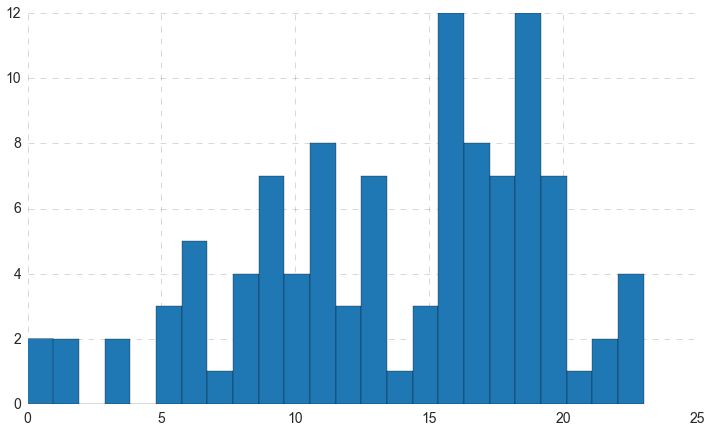

In [147]:
df.hour_schedulle.hist(bins=24)

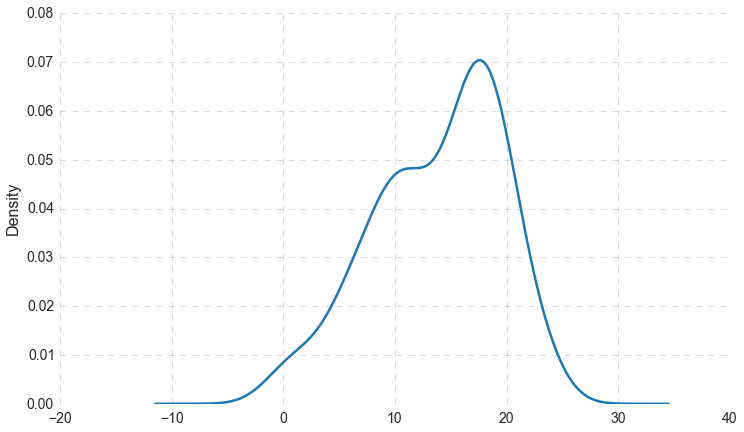

In [148]:
df.hour_schedulle.plot(kind='kde')

In [57]:
from algo_evaluation.optimization import hill_climbing as hc
from algo_evaluation.optimization import genetic_optimize as ga

In [170]:
def create_domain():
    domain = []
    for i in range(len(df_ex)):
        domain.append((0.0, 23.0))
        #$domain.append((0.0, 59.0))
    return domain

In [171]:
domain = create_domain()

In [172]:
len(domain)

10

In [155]:
def create_example_df():
    df_ex = pd.DataFrame(data = np.random.randint(2, size=(10,4)), 
                         columns=['resourse_a','resourse_b', 'resourse_c', 'resourse_d'], 
                         index=['job_' + str(i) for i in range(10)])
    df_ex['time'] = np.random.randint(100, size=10)
    df_ex['current_start_time'] = df['hour_schedulle'][:10].values
    return df_ex

In [156]:
df_ex = create_example_df()

In [157]:
df_ex

,resourse_a,resourse_b,resourse_c,resourse_d,time,current_start_time
job_0,1,0,1,0,20,11
job_1,0,1,0,0,19,15
job_2,1,1,1,0,30,15
job_3,0,0,1,1,27,19
job_4,0,1,1,1,58,16
job_5,1,1,0,0,17,16
job_6,0,1,1,0,55,18
job_7,0,1,0,0,93,23
job_8,0,0,0,0,21,5
job_9,1,0,1,0,22,17


In [215]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
def create_dist(solution):
    df_a = pd.DataFrame(solution, columns=['start'])
    df_a['end'] = df_a['start'] + (df_ex['time'].astype(float) / 60).values
    return pdist(df_a)
    
def compute_fitness(solution):
    """
       compute the min overlap between jobs and resources
    """
    dist = create_dist(df_ex).sum()
    return dist

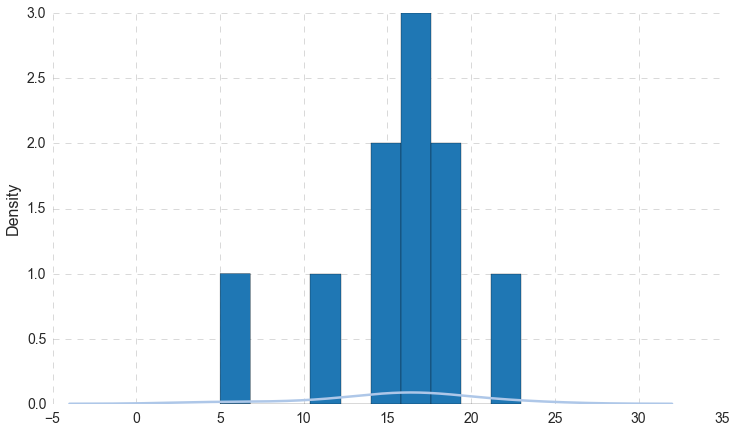

In [160]:
df_ex.current_start_time.hist()
df_ex.current_start_time.plot(kind='kde')

In [173]:
import random
sol=[random.randint(domain[i][0], domain[i][1])
      for i in range(len(domain))]

In [174]:
sol

[14, 8, 19, 19, 17, 21, 20, 7, 10, 9]

In [168]:
len(sol)

105

In [169]:
len(df)

105

In [175]:
df_ex['ex_sol'] = sol

,resourse_a,resourse_b,resourse_c,resourse_d,time,current_start_time,ex_sol
job_0,1,0,1,0,20,11,14
job_1,0,1,0,0,19,15,8
job_2,1,1,1,0,30,15,19
job_3,0,0,1,1,27,19,19
job_4,0,1,1,1,58,16,17
job_5,1,1,0,0,17,16,21
job_6,0,1,1,0,55,18,20
job_7,0,1,0,0,93,23,7
job_8,0,0,0,0,21,5,10
job_9,1,0,1,0,22,17,9


In [214]:
df_a = create_dist(df_ex, sol)
print df_a

[  8.49707466   7.18988487   7.15403926   4.7118055    9.86420296
   8.90731597   9.08002998   5.64508144   7.047537    15.68652111
  15.65091407  13.19554849  18.36122121  17.4          1.02686145
   2.85209475   1.45         0.05         2.52014109   2.67960403
   1.73405434  16.24507618  12.83442636  14.23672871   2.4900357
   2.71313677   1.77513693  16.21141573  12.79882807  14.20118344
   5.19617915   4.2074339   13.73585131  10.34473833  11.74563749
   1.06510302  18.92452847  15.50928038  16.91173984  17.94253172
  14.54834851  15.95         3.49857114   2.16031119   1.40247797]


In [199]:
df_a = pd.DataFrame(sol, columns=['start'])

In [200]:
df_a

,start
0,14
1,8
2,19
3,19
4,17
5,21
6,20
7,7
8,10
9,9


In [201]:
df_ex.time

job_0    20
job_1    19
job_2    30
job_3    27
job_4    58
job_5    17
job_6    55
job_7    93
job_8    21
job_9    22
Name: time, dtype: int64

In [208]:
((15 + 19./60) - (11 + 20./60))

3.9833333333333325

In [209]:
3.98 * 3.98

15.8404

In [210]:
import math

In [211]:
math.sqrt(16 + 15.84)

5.642694391866354